<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/preco_imoveis_sao_paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**by: [João Ataíde](https://www.joaoataide.com)**
#**Preço de Imóveis em São Paulo**

---


A cidade de São Paulo é dita como o princial centro financeiro, corporativo e mercantil da América do Sul, esta é a cidade mais populosa do Brasi, com uma área urbana aproximadamente de 949,61 m² e uma população de 12.252.023 habitantes, enumera empresas e universidade estão situadas no município.

Por ser um centro nacional de desenvolvimento, o municipio possui zoneamentos ecoêmicos muito bem definidos, havendo bairro destinado somente para moradia, instustrias e outros setores. Esse fenômeno é um dos fatores que influênciam os preços dos imóveis da cidade. 

Sabendo disso, um cliente me enviou uma proposta para prova de conhecimento, na qual eu efetuasse a construção de um modelo de previsão de preço dos imóveis de São Paulo, repassando para mim uma séria de dados de imóveis, as quais foram extraidos do desafio [Kaggle](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019), disponibilizados pela StarUp openimob.

A openimob possui uma sistema pesquisa imóveis anunciados em diversos sites e da propia plataforma, na qual compara as características de milhares de ofertas de imóveis do mercado, possuindo então um banco de dados imenso, no qual foi disponibilizado pela mesma.

Esse trabalho de previsão de preço de imóveis é recorrente, tendo um valor significativo em aplicações de Geomarketing para empresas, ou até mesmo aplicações para pessoas nas quais querem comprar seu imóvel.


##Importando Dados e Bibliotecas

Inicialmente foi necessário importar todas as bibliotecas necessparias para realizado o trabalho.


In [ ]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
import geopy.distance


#importar bibliotecar de modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# configurar a visualização
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


###Importando dados do Kaggle-

Nessa etapa inicial realizei uma conecção com a plataforma de competição Kaggle onde estão disponíveis os dados, não precisando baixa-los ou usar o kaggle notebook.

In [ ]:
!pip install kaggle -q

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d argonalyst/sao-paulo-real-estate-sale-rent-april-2019

  0% 0.00/206k [00:00<?, ?B/s]
100% 206k/206k [00:00<00:00, 80.1MB/s]


In [ ]:
!ls

kaggle.json  sample_data  sao-paulo-real-estate-sale-rent-april-2019.zip


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('sao-paulo-real-estate-sale-rent-april-2019.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

## Dados de Imóveis

Os dados em questão tratam-se do ano de 2019, estes possuem 13640 entradas, cada uma simbolizando uma imóvel, cada imóvel com 16 variáveis, variáceis essa onde:




*   `Price`-  Preço do Imóvel (Nossa variável alvo)
*   `Condo` - 
*   `Size`-  
*   `Rooms` - 
*   `Toilets`-  
*   `Suites` - 
*   `Parking`-  
*   `Elevador` - 
*   `Furnished`-  
*   `Swimming Pool` - 
*   `New`-  
*   `District` - 
*   `Negotiation Type`-  
*   `Property Type` - 
*   `Latitude`-  
*   `Longitude` - 



In [ ]:
df = pd.read_csv("sao-paulo-real-estate-sale-rent-april-2019.zip")

In [ ]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [ ]:
print("Número de Entradas: ",df.shape[0])
print("Número de Variáveis: ",df.shape[1])

Número de Entradas:  13640
Número de Variáveis:  16


###Mudando o Nome do Bairro

In [ ]:
#Copiar o dataset
df_clean = df.copy()

In [ ]:
# Limpar os nomes do bairros
df_clean['District'] = df_clean['District'].apply(lambda x: x.split('/')[0])

# ver as 5 primeiras entradas
df_clean.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436


In [ ]:
df_clean.tail()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara,sale,apartment,-23.652060,-46.637046
13639,161987,0,44,2,1,0,1,0,0,0,0,Jardim Ângela,sale,apartment,-23.613391,-46.523109


##Análise Exploratória

In [ ]:
#Contar valores ausente
df_clean.isnull().mean()

Price               0.0
Condo               0.0
Size                0.0
Rooms               0.0
Toilets             0.0
Suites              0.0
Parking             0.0
Elevator            0.0
Furnished           0.0
Swimming Pool       0.0
New                 0.0
District            0.0
Negotiation Type    0.0
Property Type       0.0
Latitude            0.0
Longitude           0.0
dtype: float64

Fazendo o cálculo dos valores ausente, foi possível notar que o dataset diponibilizado já estava limpo.

In [ ]:
#Quais tipos de dados
df_clean.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

Com todos os tipos estabelecidos corretamento, podemos análisas então o  valores únicos do dataset e as estatísticas básicas.




In [ ]:
#Valores únicos
df_clean.nunique().sort_values(ascending = False)

Longitude           8451
Latitude            8405
Price               1881
Condo               1415
Size                 339
District              96
Parking               10
Toilets                8
Rooms                  8
Suites                 7
Negotiation Type       2
New                    2
Swimming Pool          2
Furnished              2
Elevator               2
Property Type          1
dtype: int64

In [ ]:
df_clean.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


Além disso, podemos analisas as variáveis categóricas, começando com o balancemaneot dos tipos de negociação.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


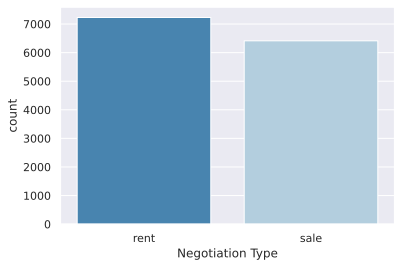

In [ ]:
#plotar balanceamento
sns.countplot(df_clean['Negotiation Type'], palette="Blues_r" )
plt.show()


In [ ]:
print("Proporção entre os inadimplentes (%)")
df_clean['Negotiation Type'].value_counts()/df_clean.shape[0]*100

Proporção entre os inadimplentes (%)


rent    52.991202
sale    47.008798
Name: Negotiation Type, dtype: float64

Vendo que a variável tipo de negociação está balanceda, pode então avaliar a então os distritos.

In [ ]:
df_clean.District.value_counts()

Moema              293
Mooca              288
Brás               255
Brooklin           250
Bela Vista         250
                  ... 
São Rafael          44
Jardim São Luis     44
Grajaú              37
São Domingos        35
Perus               30
Name: District, Length: 96, dtype: int64

O dataset possui 96 distritos, sendo então a Moema como maior quantidade de imóveis e a Perus com menor quantidade.


No então, ficou a dúvida de qual a distribuição do preço em relação ao tipo de negtociação.

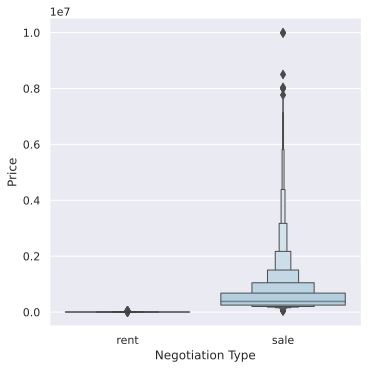

In [ ]:
ax = sns.catplot(x = 'Negotiation Type', y = 'Price', kind = 'boxen', palette="Blues_r",
                data = df_clean)

In [ ]:
#Relação do tipo de negociação com o preço e condominio
sns.scatterplot(x = 'Condo', y = 'Price', hue = 'Negotiation Type', palette="Blues_r", data = df_clean)

<Figure size 864x576 with 0 Axes>

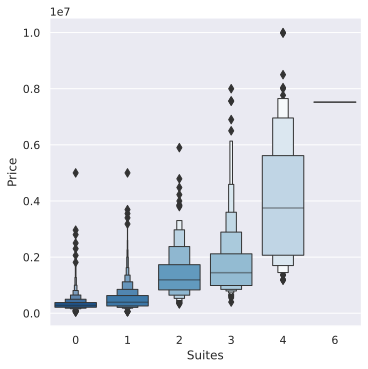

In [ ]:
# Relação do preço com o número de suites
plt.figure(figsize = (12,8))
ax = sns.catplot(x = 'Suites', y = 'Price',data = df_clean[df_clean['Negotiation Type'] == 'sale'], palette="Blues_r", kind = 'boxen');

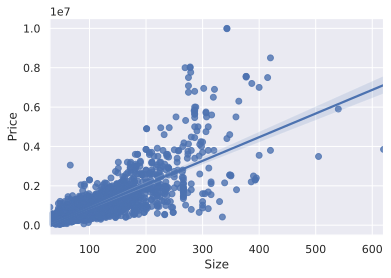

In [ ]:
#Relação do preço e tamanho do imóvel
sns.regplot(x = 'Size', y = 'Price',data = df_clean[df_clean['Negotiation Type'] == 'sale']);

In [ ]:
data_rent = df_clean[df_clean['Negotiation Type'] == 'rent']
data_sale = df_clean[df_clean['Negotiation Type'] == 'sale']

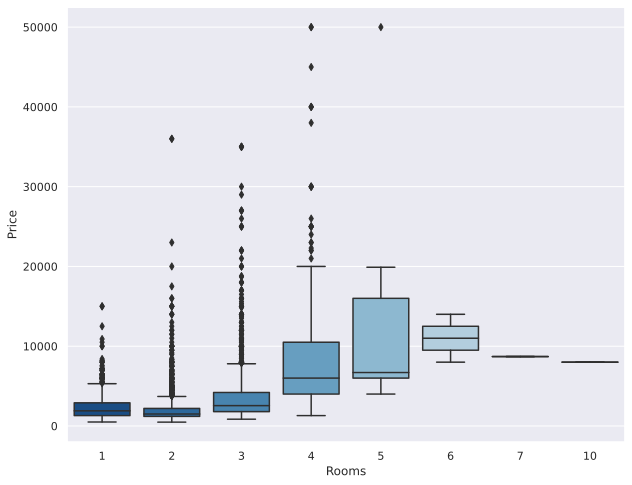

In [ ]:
plt.figure(figsize =(10,8))
ax = sns.boxplot(x = 'Rooms', y = 'Price',data = data_rent, palette = 'Blues_r')

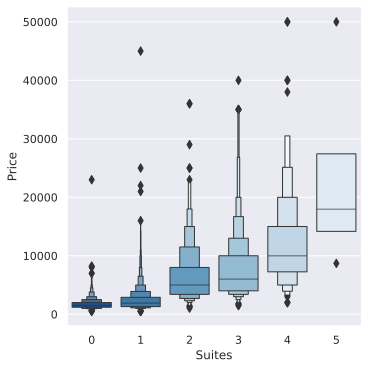

In [ ]:
ax = sns.catplot(x = 'Suites', y = 'Price',data = data_rent, kind = 'boxen',
            palette = 'Blues_r')

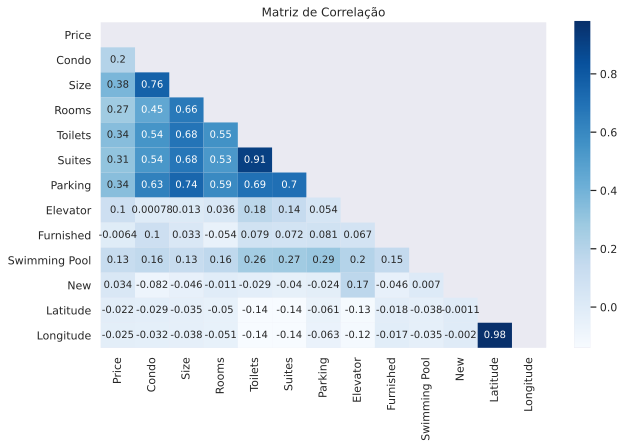

In [ ]:
#Criando uma mascara da diagonal superior
mask = np.zeros_like(df_clean.corr())
mask[np.triu_indices_from(mask)] = True

#Plotar matriz de correlação
plt.figure(figsize = (10,6))
plt.title("Matriz de Correlação")

sns.heatmap(df_clean.corr(), mask= mask, cmap = 'Blues', annot=True )
plt.show()

Poucos dados de correlação alta.


##Construção do Modelo
###Pré-processamento



In [ ]:
#Importando bibliotecas para o modelo

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
df_model = df_clean.copy()

# dummy variables
df_model = pd.get_dummies(df_model)

In [ ]:
df_model.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,District_Alto de Pinheiros/São Paulo,District_Anhanguera/São Paulo,District_Aricanduva/São Paulo,District_Artur Alvim/São Paulo,District_Barra Funda/São Paulo,District_Bela Vista/São Paulo,District_Belém/São Paulo,District_Bom Retiro/São Paulo,District_Brasilândia/São Paulo,District_Brooklin/São Paulo,District_Brás/São Paulo,District_Butantã/São Paulo,District_Cachoeirinha/São Paulo,District_Cambuci/São Paulo,District_Campo Belo/São Paulo,District_Campo Grande/São Paulo,District_Campo Limpo/São Paulo,District_Cangaíba/São Paulo,District_Capão Redondo/São Paulo,District_Carrão/São Paulo,District_Casa Verde/São Paulo,District_Cidade Ademar/São Paulo,District_Cidade Dutra/São Paulo,District_Cidade Líder/São Paulo,District_Cidade Tiradentes/São Paulo,District_Consolação/São Paulo,District_Cursino/São Paulo,...,District_Perus/São Paulo,District_Pinheiros/São Paulo,District_Pirituba/São Paulo,District_Ponte Rasa/São Paulo,District_Raposo Tavares/São Paulo,District_República/São Paulo,District_Rio Pequeno/São Paulo,District_Sacomã/São Paulo,District_Santa Cecília/São Paulo,District_Santana/São Paulo,District_Santo Amaro/São Paulo,District_Sapopemba/São Paulo,District_Saúde/São Paulo,District_Socorro/São Paulo,District_São Domingos/São Paulo,District_São Lucas/São Paulo,District_São Mateus/São Paulo,District_São Miguel/São Paulo,District_São Rafael/São Paulo,District_Sé/São Paulo,District_Tatuapé/São Paulo,District_Tremembé/São Paulo,District_Tucuruvi/São Paulo,District_Vila Andrade/São Paulo,District_Vila Curuçá/São Paulo,District_Vila Formosa/São Paulo,District_Vila Guilherme/São Paulo,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo,Negotiation Type_rent,Negotiation Type_sale,Property Type_apartment
0,930,220,47,2,2,1,1,0,0,0,0,-23.543138,-46.479486,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1000,148,45,2,2,1,1,0,0,0,0,-23.550239,-46.480718,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1000,100,48,2,2,1,1,0,0,0,0,-23.542818,-46.485665,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1000,200,48,2,2,1,1,0,0,0,0,-23.547171,-46.483014,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,1300,410,55,2,2,1,1,1,0,0,0,-23.525025,-46.482436,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
# separar entre variáveis X e y
X_simp = df_model.drop('Price', axis=1)
y_simp = df_model['Price']

In [ ]:
# split entre datasets de treino e teste
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp, test_size=0.30)

In [ ]:
# instanciar e treinar o modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train_simp, y_train_simp)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# fazer as previsões em cima do dataset de teste
y_pred_simp = model.predict(X_test_simp)

# métricas de avaliação
print("r2: \t{:.4f}".format(r2_score(y_test_simp, y_pred_simp)))
print("MAE: \t{:.4f}".format(mean_absolute_error(y_test_simp, y_pred_simp)))
print("MSE: \t{:.4f}".format(mean_squared_error(y_test_simp, y_pred_simp)))

r2: 	0.9092
MAE: 	48569.2621
MSE: 	28584954378.3685


####Importância das variáveis

#### Salvando o modelo

O nosso modelo está treinado e é capaz de realizar previsões. No entanto, está "preso" ao *kernel* rodando dentro do Google Colab.

Imagine precisar rodar todas as células novamente a cada vez que fosse fazer uma previsão. Seria inviável!

Para conseguir exportar o modelo de *machine learning* (na verdade, isso pode ser feito com qualquer estrutura de dados) vou usar a biblioteca `joblib`.

In [ ]:
# salvar o modelo em formato joblib
from joblib import dump, load

dump(model, 'model.joblib') 

['model.joblib']

Uma vez que você exporta o seu modelo, é extremamente importante que você também salve os nomes das *features* que esse modelo espera receber, e tem que ser na ordem exata que ele foi treinado.

Da mesma maneira que fizemos com o modelo, salvei os nomes das variáveis em `features_simples.names`.

In [ ]:
# salvar os nomes das features do modelo simples
features = X_train_simp.columns.values

dump(features, 'features.names') 

['features.names']

##Conclusão

Ainda não acabaou, pois a extração do modelo servirar para alimentarmos o nosso modelo em deploy (Produção)